# DEALING WITH IMBALANCED DATASET : "Target"

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [2]:
data = pd.read_csv('preprocessed_predictive_maintenance.csv', sep=',')
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,0,298.1,308.6,1551,42.8,0,0,1
1,2,L47181,-1,298.2,308.7,1408,46.3,3,0,1
2,3,L47182,-1,298.1,308.5,1498,49.4,5,0,1
3,4,L47183,-1,298.2,308.6,1433,39.5,7,0,1
4,5,L47184,-1,298.2,308.7,1408,40.0,9,0,1


First, we check the distribution and the ratio of Target in the preprocessed dataset

Class distribution:
 Target
0    9643
1     330
Name: count, dtype: int64
Imbalance ratio ≈ 1:29.22


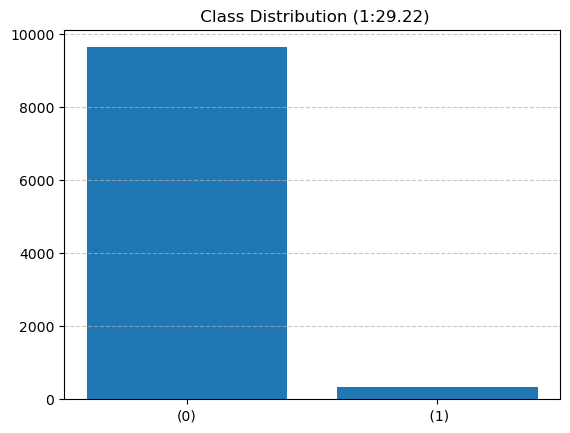

In [4]:
class_counts = data['Target'].value_counts()
print("Class distribution:\n", class_counts)

#compute imbalance ratio (majority/minority)
minority = class_counts.min()
majority = class_counts.max()
ratio = majority/minority
print(f"Imbalance ratio ≈ 1:{ratio:.2f}")

# Optional: visualize
plt.bar(['(0)', ' (1)'], class_counts)
plt.title(f" Class Distribution (1:{ratio:.2f})")
plt.ylabel("")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The ratio (class 0 over class 1) falls into the moderate imbalance category (1:10-1:50), which means we should use techniques like oversampling or SMOTE.

In [5]:
y_train = pd.read_csv('y_train.csv', sep=',')
X_train = pd.read_csv('X_train.csv', sep=',')
print(y_train.head())
print(X_train.head())
y_train_resampled_target = y_train["Target"]
X_train_resampled_target = X_train.copy()

   Target  Failure Type
0       0             1
1       0             1
2       0             1
3       0             1
4       0             1
   Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0     0                298.5                    309.6                    1441   
1    -1                302.4                    310.2                    1503   
2    -1                300.0                    309.6                    1496   
3    -1                302.3                    310.9                    1403   
4     0                300.3                    309.5                    1320   

   Torque [Nm]  Tool wear [min]  
0         48.2              107  
1         36.2              166  
2         38.8               27  
3         47.2              173  
4         62.2              142  


After oversampling: Target
0    7707
1    7707
Name: count, dtype: int64
Class distribution:
 Target
0    7707
1    7707
Name: count, dtype: int64
Imbalance ratio ≈ 1:1.00
Class distribution for resampled dataset:
 Target
0    7707
1    7707
Name: count, dtype: int64


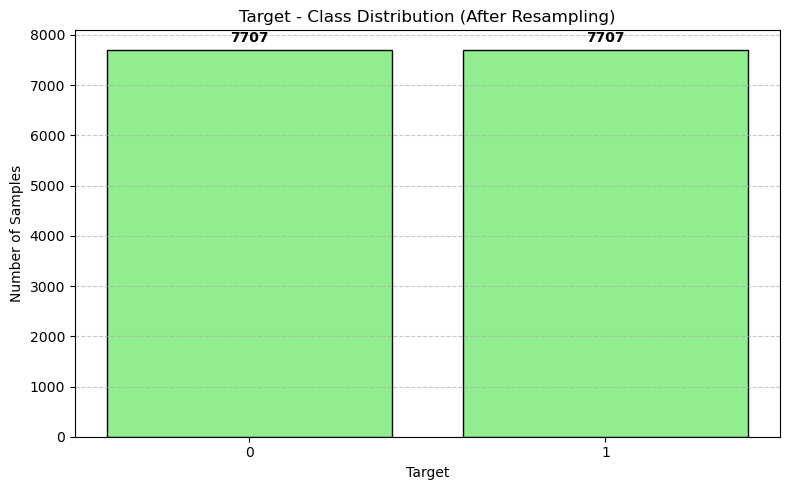

In [9]:
smote = SMOTE(random_state=42)
X_train_resampled_target, y_train_resampled_target = smote.fit_resample(X_train_resampled_target, y_train_resampled_target)

print("After oversampling:", y_train_resampled_target.value_counts())
#compute imbalance ratio (majority/minority)
class_counts = y_train_resampled_target.value_counts()
print("Class distribution:\n", class_counts)
minority = class_counts.min()
majority = class_counts.max()
ratio = majority/minority
print(f"Imbalance ratio ≈ 1:{ratio:.2f}")


resampled_count = pd.Series(y_train_resampled_target).value_counts().sort_index()
print("Class distribution for resampled dataset:\n", resampled_count)
plt.figure(figsize=(8, 5))
plt.bar(resampled_count.index, resampled_count.values, color='lightgreen', edgecolor='black')
plt.title("Target - Class Distribution (After Resampling)")
plt.xlabel("Target")
plt.ylabel("Number of Samples")
plt.xticks(resampled_count.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(resampled_count.values):
    plt.text(resampled_count.index[i], v + 0.02 * max(resampled_count.values),
             str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

Saving them into a new dataset : 

In [8]:
X_train_resampled_target.to_csv('X_train_resampled_target.csv', index=False)
y_train_resampled_target.to_csv('y_train_resampled_target.csv', index=False)